# Load libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

## Parse csv and Load data

In [3]:
import glob

path = 'data'

files = [f[5:-4].split('-') for f in glob.glob(path + "/*.csv")]
data = pd.DataFrame(files,columns=['type', 'struc', 'action'])
data['path'] = 'data/'+ data.loc[:,'type'] + '-'+ data.loc[:,'struc'] + '-' + + data.loc[:,'action']+'.csv'
data['data'] = data['path'].apply(lambda x: pd.read_csv(x))
data.sort_values('struc')

,type,struc,action,path,data
3,mutable,array,set,data/mutable-array-set.csv,size start_time stop_time total_...
5,immutable,array,set,data/immutable-array-set.csv,size start_time stop_time total_...
16,immutable,array,get,data/immutable-array-get.csv,size start_time stop_time total_...
15,mutable,array,get,data/mutable-array-get.csv,size start_time stop_time total_...
13,immutable,hashmap,put,data/immutable-hashmap-put.csv,size start_time stop_time total_...
23,immutable,hashmap,remove,data/immutable-hashmap-remove.csv,size start_time stop_time total_...
2,immutable,hashmap,get,data/immutable-hashmap-get.csv,size start_time stop_time total_...
22,mutable,hashmap,put,data/mutable-hashmap-put.csv,size start_time stop_time total_...
18,mutable,hashmap,get,data/mutable-hashmap-get.csv,size start_time stop_time total_...
12,mutable,hashmap,remove,data/mutable-hashmap-remove.csv,size start_time stop_time total_...


###  Creating the log_run_time

In [4]:
'''
This function computes the log base 2 of the parameter passed to the function
If the parameter is equal to zero then we assume it's equal to 1 because it isn't that big of a difference in milliseconds
'''
def log_time(run_time):
    if run_time ==0:
        run_time=1
    return math.log(run_time,2)
    

In [5]:
 for row in data.itertuples():
        row.data['log_run_time'] = row.data.loc[:,"total_time"].apply(lambda x: log_time(x))

## Plot by structure 

In [6]:
struc = np.unique(data.loc[:,'struc'])
type_str = np.unique(data.loc[:,'type'])
print(struc)

['array' 'hashmap' 'heap' 'queue' 'stack' 'treeset']


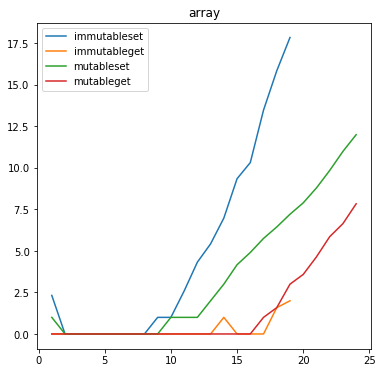

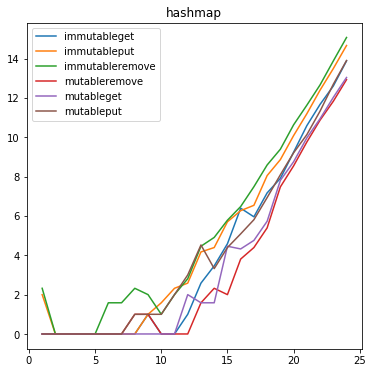

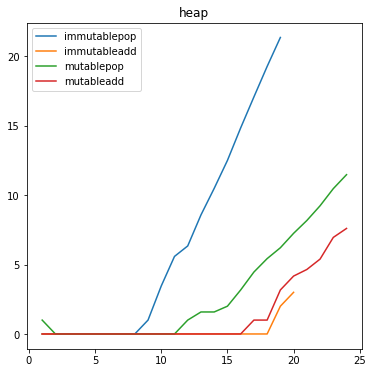

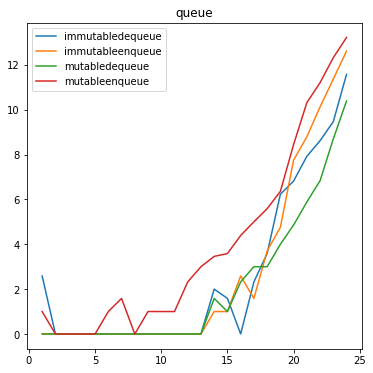

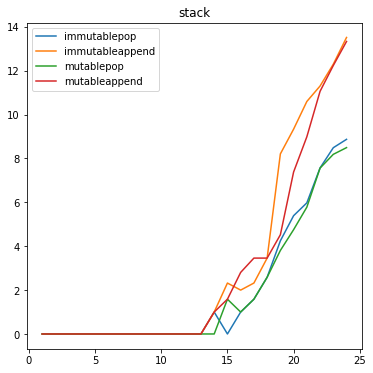

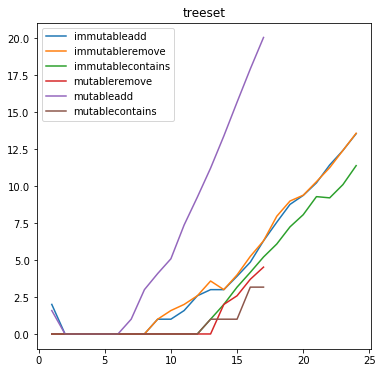

In [7]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    
    fig = plt.figure(figsize=(6, 6))
    plt.title(x)
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        bench_data = row.data

        #print((_type+_action))
        #print(bench_data)
        plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))

    plt.legend()
    plt.show()


### Limiting the x axis

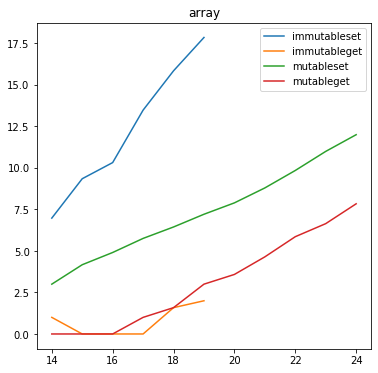

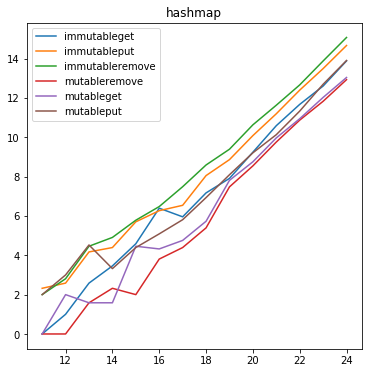

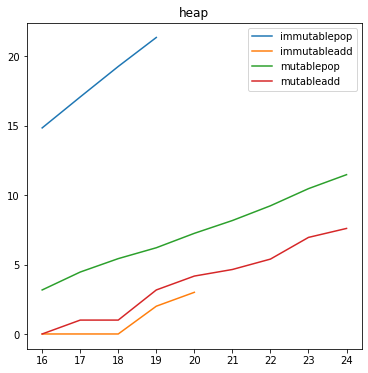

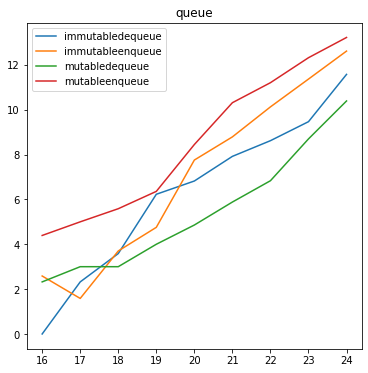

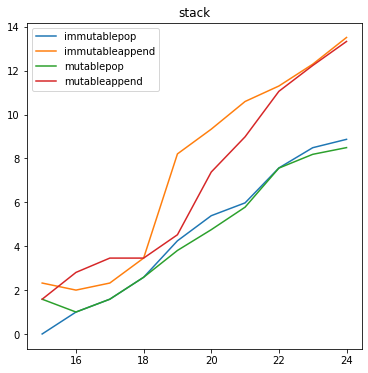

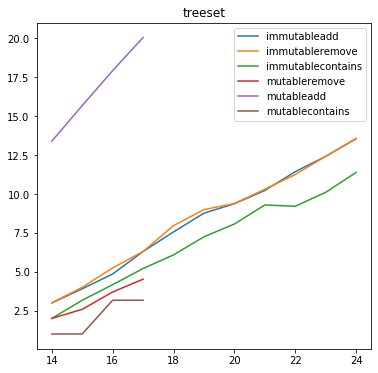

In [9]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    
    fig = plt.figure(figsize=(6, 6))
    plt.title(x)
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        if x == 'array':
            bench_data = row.data.iloc[13:]
        elif x == 'hashmap':
            bench_data = row.data.iloc[10:]
        elif x == 'heap':
            bench_data = row.data.iloc[15:]
        elif x == 'queue':
            bench_data = row.data.iloc[15:]
        elif x == 'stack':
            bench_data = row.data.iloc[14:]
        elif x == 'treeset':
            bench_data = row.data.iloc[13:]
        plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))

    plt.legend()
    plt.show()


# Superposition of benchmarks and regression

mutable set
a: 0.5271601253500225, b: -2.9639378478905507 

immutable set
a: 0.9193241860567879, b: -4.430957794783188 

mutable get
a: 0.27359951576688835, b: -1.9968763569104262 

immutable get
a: 0.06084157895748991, b: -0.3671019737474698 



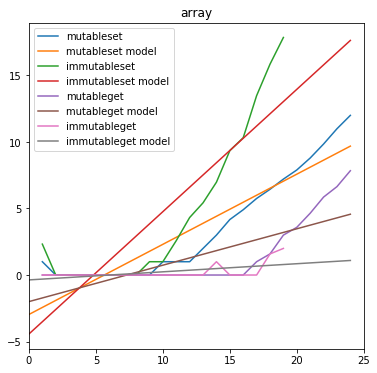

immutable get
a: 0.6226080356599417, b: -3.698117531239868 

mutable remove
a: 0.5527655143177673, b: -3.455684756219918 

immutable put
a: 0.643164506408492, b: -3.2358512405535818 

mutable get
a: 0.5760961925914889, b: -3.578027792241173 

mutable put
a: 0.6032505063025246, b: -3.2319082921024487 

immutable remove
a: 0.6403402146004815, b: -2.730589522858444 



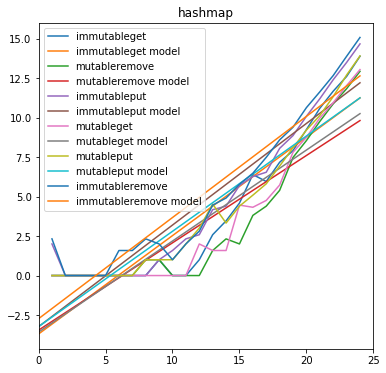

immutable pop
a: 1.2319353832020323, b: -5.979161485037927 

mutable pop
a: 0.4790009914031808, b: -2.9449575985126146 

immutable add
a: 0.06842105263157894, b: -0.46842105263157885 

mutable add
a: 0.27217113225555645, b: -1.9883836211939505 



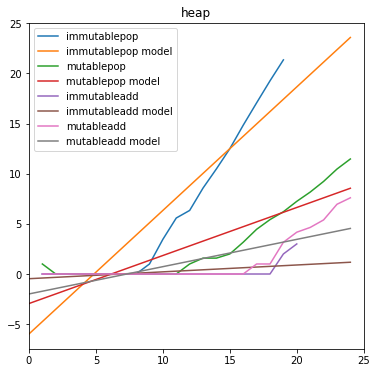

mutable dequeue
a: 0.37491017837230134, b: -2.5377744920537064 

mutable enqueue
a: 0.5469578335658415, b: -2.8458369180046277 

immutable dequeue
a: 0.4180137421062677, b: -2.612557241773586 

immutable enqueue
a: 0.49119307290977454, b: -3.420265365525195 



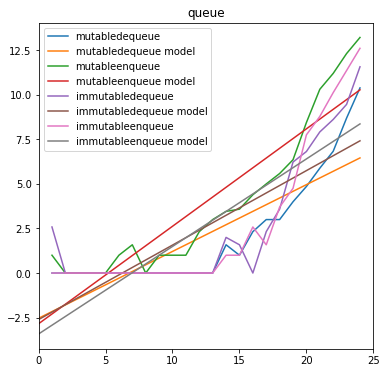

mutable pop
a: 0.3425216050357542, b: -2.3920862442011996 

immutable pop
a: 0.35507226691279764, b: -2.4916282248124464 

immutable append
a: 0.5645725126673772, b: -3.8750202362252617 

mutable append
a: 0.5200463692411776, b: -3.5903075003710776 



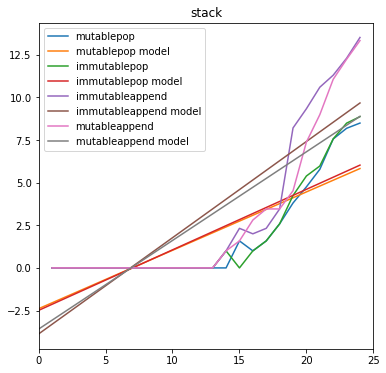

mutable remove
a: 0.21470918794061444, b: -1.1789142105879264 

immutable add
a: 0.5906931014961195, b: -3.109097961148481 

mutable add
a: 1.2794588650626444, b: -5.061810795547987 

mutable contains
a: 0.15330606622949677, b: -0.8303516547193165 

immutable remove
a: 0.613168741097225, b: -3.363553098883499 

immutable contains
a: 0.5167469605733143, b: -3.2525242151348164 



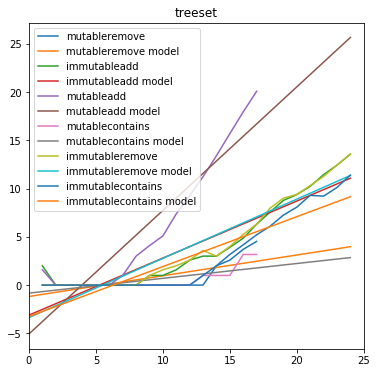

In [10]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    
    fig = plt.figure(figsize=(6, 6))
    plt.title(x)
    axes = plt.gca()
    axes.set_xlim([0,25])
    #axes.set_ylim([-10,10])
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        bench_data = row.data

        cov = bench_data.loc[:,['log_run_time','size']].cov().iloc[0][1]

        a = cov/bench_data["size"].var()
        b = bench_data["log_run_time"].mean() - bench_data["size"].mean()*a
        print((_type+' '+ _action))
        print("a: " + str(a) + ", b: " + str(b),'\n')

        x = np.arange(0,25)
        y = x*a + b
        
        plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))
        plt.plot(x, y, label=(_type+_action)+' '+'model')
        

    plt.legend()
    plt.show()


## superposition of graphs and regression - limiting the x axis

mutable set
a: 0.8604200362809796, b: -8.983114393371926 

immutable set
a: 0.9193241860567879, b: -4.430957794783188 

mutable get
a: 0.27359951576688835, b: -1.9968763569104262 

immutable get
a: 0.06084157895748991, b: -0.3671019737474698 



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

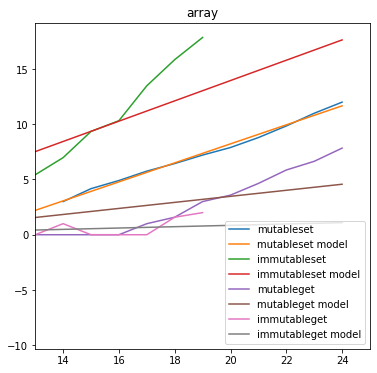

immutable get
a: 1.030159522056284, b: -11.097249496825993 

mutable remove
a: 0.5527655143177673, b: -3.455684756219918 

immutable put
a: 0.643164506408492, b: -3.2358512405535818 

mutable get
a: 0.5760961925914889, b: -3.578027792241173 

mutable put
a: 0.6032505063025246, b: -3.2319082921024487 

immutable remove
a: 0.6403402146004815, b: -2.730589522858444 



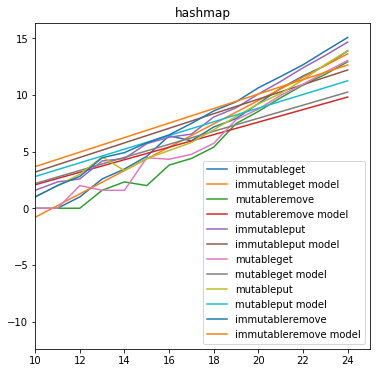

immutable pop
a: 2.1733753516292906, b: -19.90329860430279 

mutable pop
a: 0.4790009914031808, b: -2.9449575985126146 

immutable add
a: 0.06842105263157894, b: -0.46842105263157885 

mutable add
a: 0.27217113225555645, b: -1.9883836211939505 



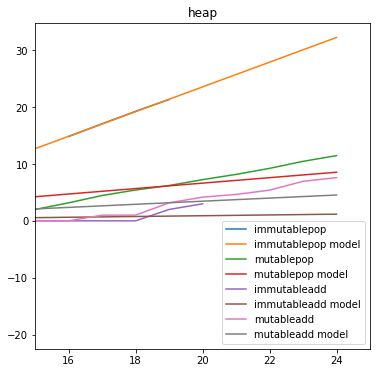

mutable dequeue
a: 0.872406164204883, b: -11.887856601492647 

mutable enqueue
a: 0.5469578335658415, b: -2.8458369180046277 

immutable dequeue
a: 0.4180137421062677, b: -2.612557241773586 

immutable enqueue
a: 0.49119307290977454, b: -3.420265365525195 



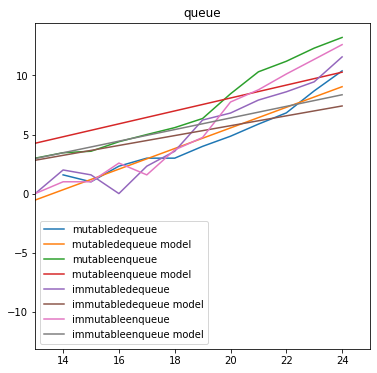

mutable pop
a: 0.9269692635373951, b: -13.541259473989456 

immutable pop
a: 0.35507226691279764, b: -2.4916282248124464 

immutable append
a: 0.5645725126673772, b: -3.8750202362252617 

mutable append
a: 0.5200463692411776, b: -3.5903075003710776 



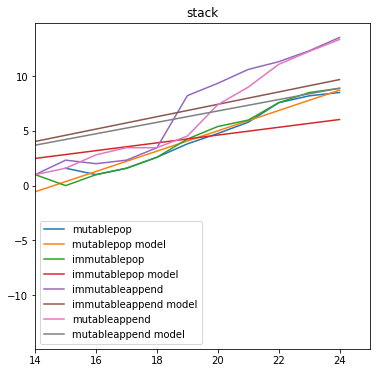

mutable remove
a: 0.8686163085590975, b: -10.261311738936197 

immutable add
a: 0.5906931014961195, b: -3.109097961148481 

mutable add
a: 1.2794588650626444, b: -5.061810795547987 

mutable contains
a: 0.15330606622949677, b: -0.8303516547193165 

immutable remove
a: 0.613168741097225, b: -3.363553098883499 

immutable contains
a: 0.5167469605733143, b: -3.2525242151348164 



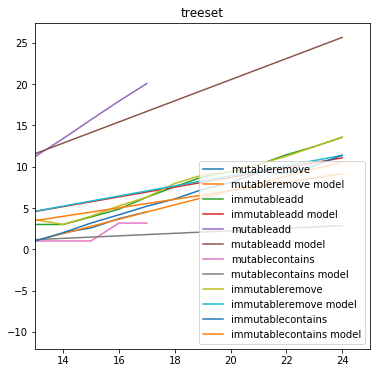

In [11]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    
    fig = plt.figure(figsize=(6, 6))
    plt.title(x)
    axes = plt.gca()
    #axes.set_xlim([0,25])
    #axes.set_ylim([-10,10])
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        bench_data = row.data
        
        if x == 'array':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])

        elif x == 'hashmap':
            bench_data = row.data.iloc[10:]
            axes.set_xlim([10,25])

        elif x == 'heap':
            bench_data = row.data.iloc[15:]
            axes.set_xlim([15,25])

        elif x == 'queue':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])

        elif x == 'stack':
            bench_data = row.data.iloc[14:]
            axes.set_xlim([14,25])

        elif x == 'treeset':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])
        cov = bench_data.loc[:,['log_run_time','size']].cov().iloc[0][1]

        a = cov/bench_data["size"].var()
        b = bench_data["log_run_time"].mean() - bench_data["size"].mean()*a
        print((_type+' '+ _action))
        print("a: " + str(a) + ", b: " + str(b),'\n')

        x = np.arange(0,25)
        y = x*a + b
        
        plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))
        plt.plot(x, y, label=(_type+_action)+' '+'model')
        

    plt.legend()
    plt.show()


# Computing the coefficients for each structure

In [19]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    print(x)
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        bench_data = row.data
            
        # Computing coeffs
        cov = bench_data.loc[:,['log_run_time','size']].cov().iloc[0][1]

        a = cov/bench_data["size"].var()
        b = bench_data["log_run_time"].mean() - bench_data["size"].mean()*a
        #print(x)
        print((_type+' '+_action))
        print("a: " + str(a) + ", b: " + str(b),'\n')

        x = np.arange(0,25)
        y = x*a + b
    print()

array
immutable set
a: 0.9193241860567879, b: -4.430957794783188 

immutable get
a: 0.06084157895748991, b: -0.3671019737474698 

mutable set
a: 0.5271601253500225, b: -2.9639378478905507 

mutable get
a: 0.27359951576688835, b: -1.9968763569104262 


hashmap
immutable get
a: 0.6226080356599417, b: -3.698117531239868 

immutable put
a: 0.643164506408492, b: -3.2358512405535818 

immutable remove
a: 0.6403402146004815, b: -2.730589522858444 

mutable remove
a: 0.5527655143177673, b: -3.455684756219918 

mutable get
a: 0.5760961925914889, b: -3.578027792241173 

mutable put
a: 0.6032505063025246, b: -3.2319082921024487 


heap
immutable pop
a: 1.2319353832020323, b: -5.979161485037927 

immutable add
a: 0.06842105263157894, b: -0.46842105263157885 

mutable pop
a: 0.4790009914031808, b: -2.9449575985126146 

mutable add
a: 0.27217113225555645, b: -1.9883836211939505 


queue
immutable dequeue
a: 0.4180137421062677, b: -2.612557241773586 

immutable enqueue
a: 0.49119307290977454, b: -3.4

### Compute the coeffs while Limiting the X axis 

In [22]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    print(x)
    
    for row in df.itertuples():
        _type = row.type
        _action = row.action
        
        bench_data = row.data
        
        if x == 'array':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])

        elif x == 'hashmap':
            bench_data = row.data.iloc[10:]
            axes.set_xlim([10,25])

        elif x == 'heap':
            bench_data = row.data.iloc[15:]
            axes.set_xlim([15,25])

        elif x == 'queue':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])

        elif x == 'stack':
            bench_data = row.data.iloc[14:]
            axes.set_xlim([14,25])

        elif x == 'treeset':
            bench_data = row.data.iloc[13:]
            axes.set_xlim([13,25])
        
            
        # Computing coeffs
        cov = bench_data.loc[:,['log_run_time','size']].cov().iloc[0][1]

        a = cov/bench_data["size"].var()
        b = bench_data["log_run_time"].mean() - bench_data["size"].mean()*a
        print((_type+' '+_action))
        print("a: " + str(a) + ", b: " + str(b),'\n')
        x = np.arange(0,25)
        y = x*a + b    
    print()

array
immutable set
a: 2.201170641207468, b: -24.014596612471358 

immutable get
a: 0.06084157895748991, b: -0.3671019737474698 

mutable set
a: 0.5271601253500225, b: -2.9639378478905507 

mutable get
a: 0.27359951576688835, b: -1.9968763569104262 


hashmap
immutable get
a: 1.030159522056284, b: -11.097249496825993 

immutable put
a: 0.643164506408492, b: -3.2358512405535818 

immutable remove
a: 0.6403402146004815, b: -2.730589522858444 

mutable remove
a: 0.5527655143177673, b: -3.455684756219918 

mutable get
a: 0.5760961925914889, b: -3.578027792241173 

mutable put
a: 0.6032505063025246, b: -3.2319082921024487 


heap
immutable pop
a: 2.1733753516292906, b: -19.90329860430279 

immutable add
a: 0.06842105263157894, b: -0.46842105263157885 

mutable pop
a: 0.4790009914031808, b: -2.9449575985126146 

mutable add
a: 0.27217113225555645, b: -1.9883836211939505 


queue
immutable dequeue
a: 1.087975100405873, b: -15.206273605112216 

immutable enqueue
a: 0.49119307290977454, b: -3.4

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise

##  Per struc, per action

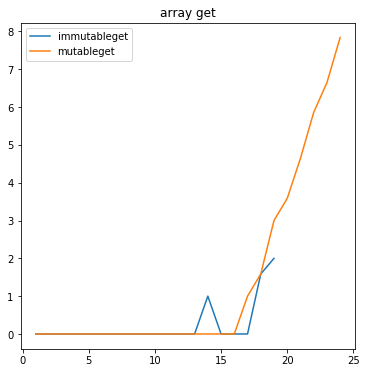

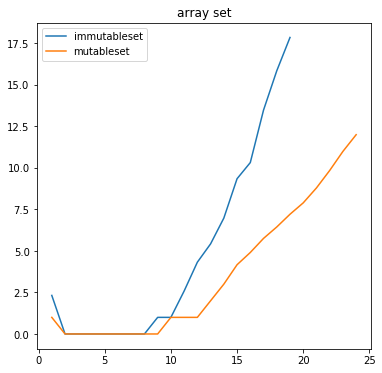

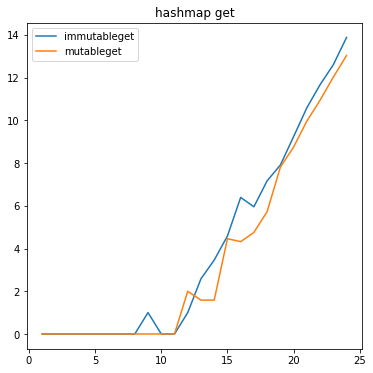

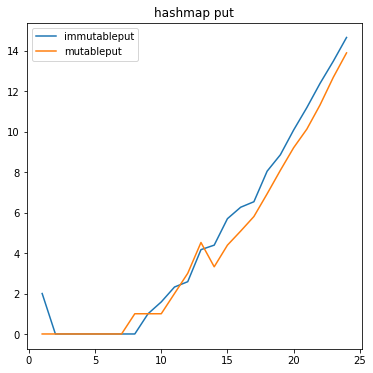

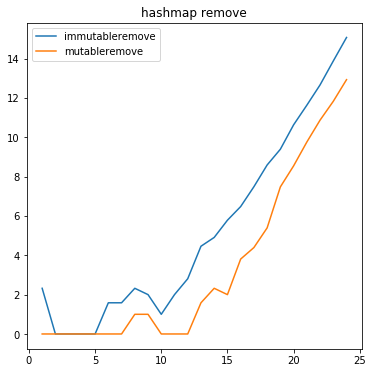

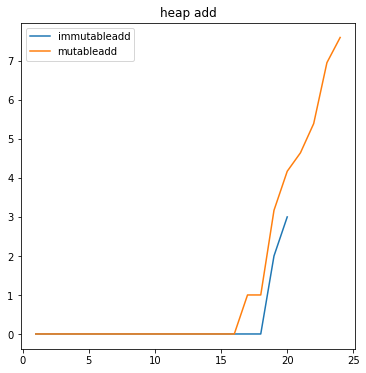

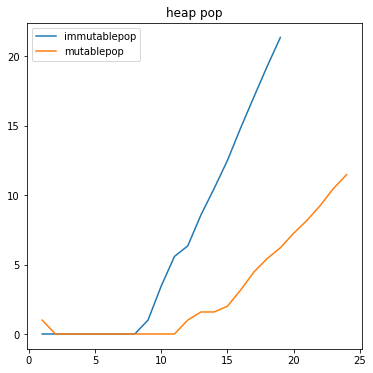

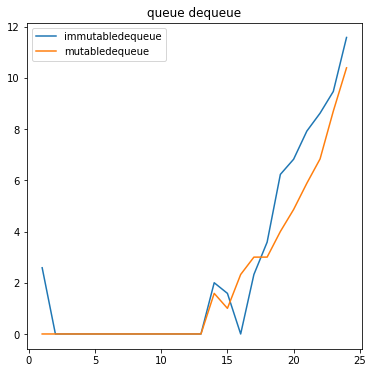

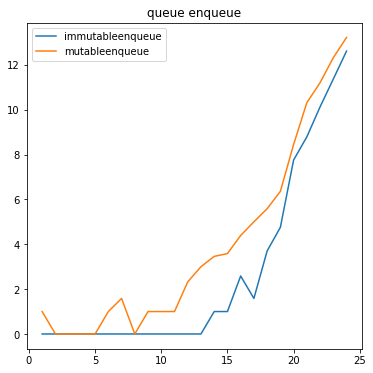

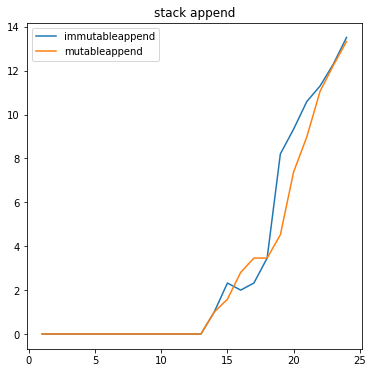

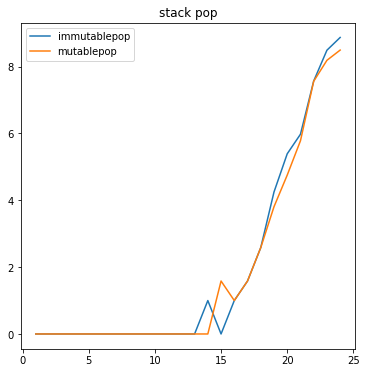

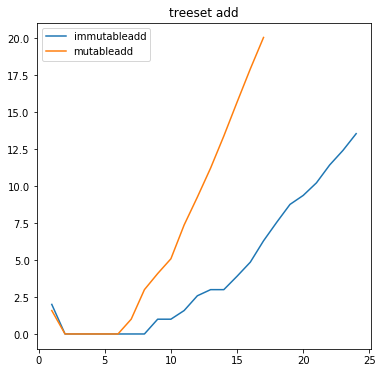

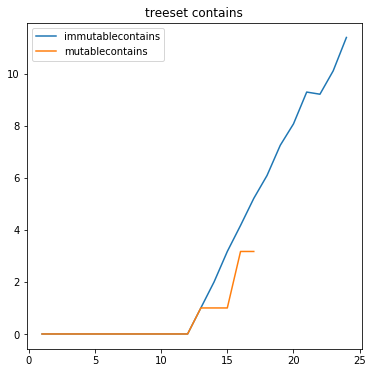

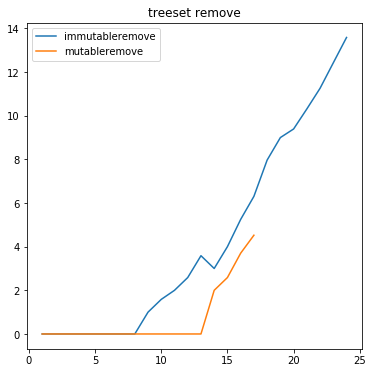

In [32]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    
    
    actions = np.unique(df.loc[:,'action'])

    for ac in actions:
        fig = plt.figure(figsize=(6, 6))
        plt.title(x+' '+ac)
    
        df_tmp = df[df.loc[:,'action'] == ac]
        for row in df_tmp.itertuples():
            _type = row.type
            _action = row.action
            bench_data = row.data


            plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))

        plt.legend()
        plt.show()


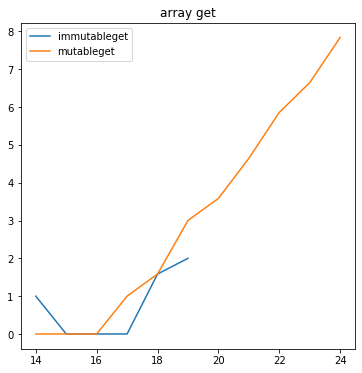

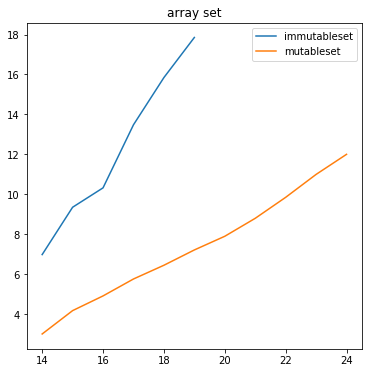

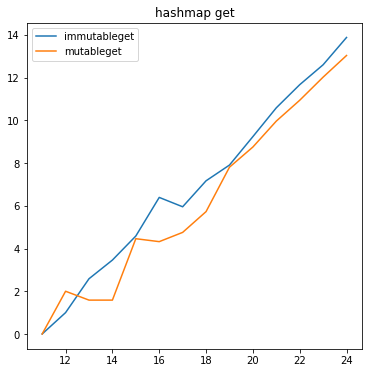

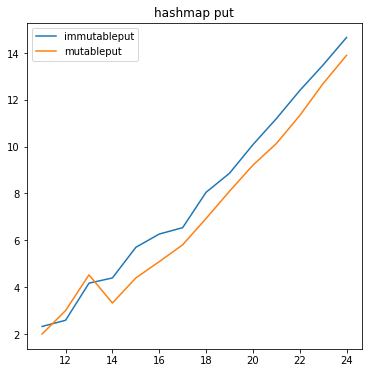

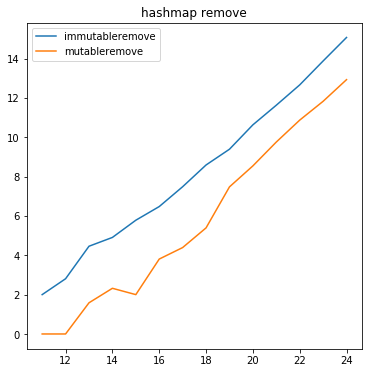

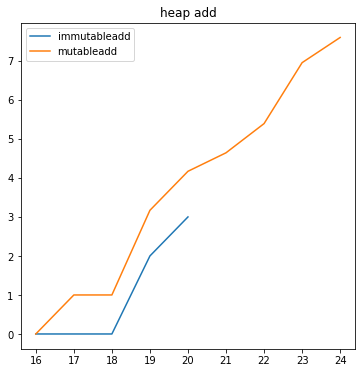

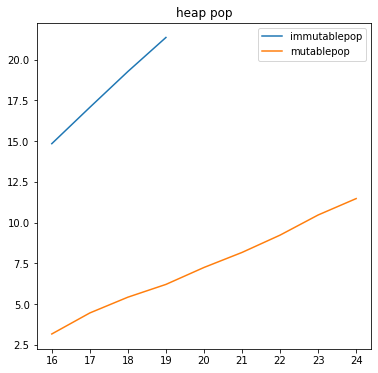

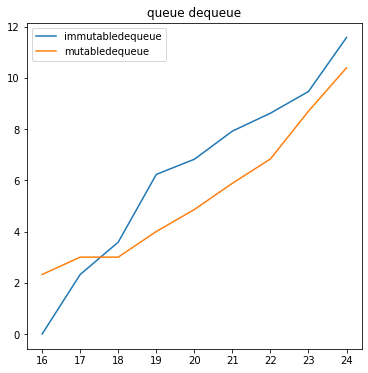

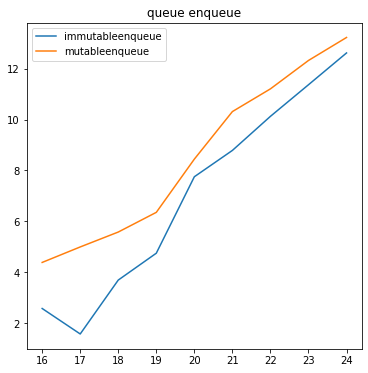

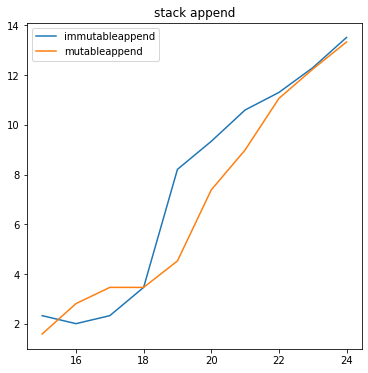

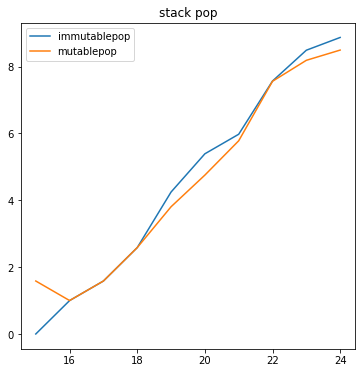

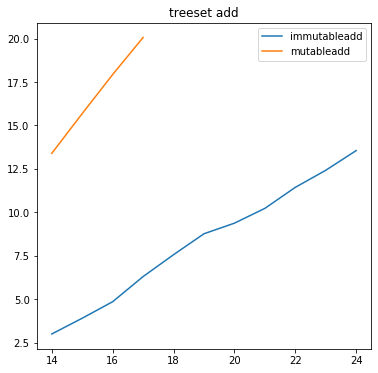

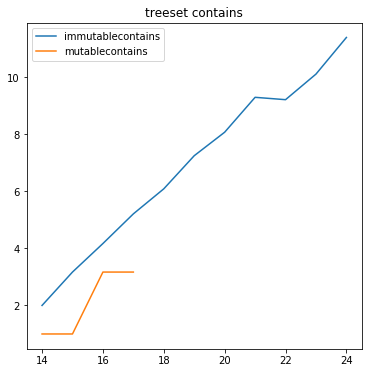

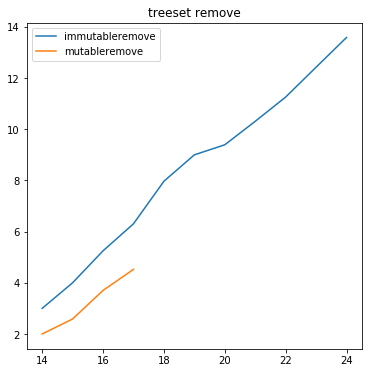

In [33]:
for x in struc:
    df = data[data.loc[:,'struc'] == x]
    df = df.sort_values('type')
    
    
    actions = np.unique(df.loc[:,'action'])

    for ac in actions:
        fig = plt.figure(figsize=(6, 6))
        plt.title(x+' '+ac)
    
        df_tmp = df[df.loc[:,'action'] == ac]
        for row in df_tmp.itertuples():
            _type = row.type
            _action = row.action
            bench_data = row.data
            
            if x == 'array':
                bench_data = row.data.iloc[13:]
            elif x == 'hashmap':
                bench_data = row.data.iloc[10:]
            elif x == 'heap':
                bench_data = row.data.iloc[15:]
            elif x == 'queue':
                bench_data = row.data.iloc[15:]
            elif x == 'stack':
                bench_data = row.data.iloc[14:]
            elif x == 'treeset':
                bench_data = row.data.iloc[13:]

            plt.plot(bench_data.loc[:,"size"], bench_data.loc[:,"log_run_time"], label=(_type+_action))

        plt.legend()
        plt.show()
